<a href="https://colab.research.google.com/github/Garypythonn/objectspython/blob/master/CasoBiden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tweepy==3.9.0

#Autenticar

In [ ]:
import tweepy

In [ ]:
#Las claves obtenidas:

#Autenticación
api_key =""
api_secret =""

#Autorizacipon (tipos de permisos)
access_token = ""
access_token_secret = ""
#?
bearer_token=""

In [ ]:
#Proceso de autenticación

auth = tweepy.OAuthHandler(api_key, api_secret) #Creamos el objeto auth
auth.set_access_token(access_token, access_token_secret) #Ponemos los parámetros del tipo de acceso que obtuvimos.

# Con este objeto (api) realizaremos todas las llamadas al API. Toma como parámetro la instancia auth.
# El uso de 'wait_on_rate_limit=True'  limita el número de llamadas y evita el error 429.
api = tweepy.API(auth, wait_on_rate_limit=True)  

#Cuenta Biden

In [ ]:
# Cuenta de Joe Biden
number_of_tweets = 200 
tweets = [] 
likes = [] 
time = []

for i in tweepy.Cursor(api.user_timeline, id="joebiden", tweet_mode="extended").items (number_of_tweets):
  tweets.append(i. full_text) 
  likes.append(i.favorite_count) 
  time.append(i.created_at)

In [ ]:
import pandas as pd
df=pd.DataFrame({'tweets':tweets,'likes':likes,'time':time})
df

,tweets,likes,time
0,If states try to block a woman from getting me...,10119,2022-07-07 21:50:00
1,If extremist governors try to block a woman fr...,28580,2022-07-07 17:44:00
2,Congress must act to codify Roe and the filibu...,39206,2022-07-06 23:30:01
3,"This fall, Roe is on the ballot. Personal free...",33800,2022-07-05 20:23:00
4,RT @POTUS: Jill and I are shocked by the sense...,0,2022-07-04 23:37:54
...,...,...,...
195,"If Republicans have their way, up to 100 milli...",7207,2022-04-06 16:26:16
196,"RT @POTUS: Today, my Administration is extendi...",0,2022-04-06 14:45:05
197,Over 31 million people now have health insuran...,13383,2022-04-06 00:56:00
198,"Mr. President, welcome back to the White House...",67803,2022-04-05 23:09:01


In [ ]:
#Descartamos los retweets
df=df[~df.tweets.str.contains("RT")]
df

In [ ]:
#Tweets con más likes
mostlike=df.loc[df.likes.nlargest(5).index]
mostlike

In [ ]:
#https://www.youtube.com/watch?v=MpIi4HtCiVk


!python -m spacy download en_core_web_lg

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import matplotlib.pyplot as plt 
import re 
import spacy 
nlp = spacy.load('en_core_web_lg') 
import seaborn as sns

In [ ]:
list_of_sentences=[sentence for sentence in df.tweets]
lines=[]
for sentence in list_of_sentences:
  words=sentence.split()
  for w in words:
    lines.append(w)

In [ ]:
#Expresión regular:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]


lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [ ]:
#Esta parte es copy-paste

#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

In [ ]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

In [ ]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

#df
#df['freq'] = df.groupby(0)[0].transform('count')
#df['freq'] = df.groupby(0)[0].transform('count')
#df.sort_values(by = ('freq'), ascending=False)

In [ ]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


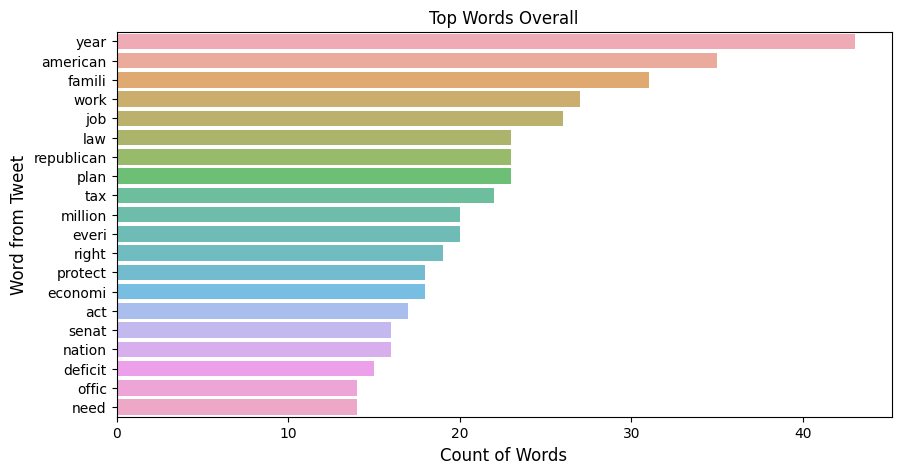

In [ ]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


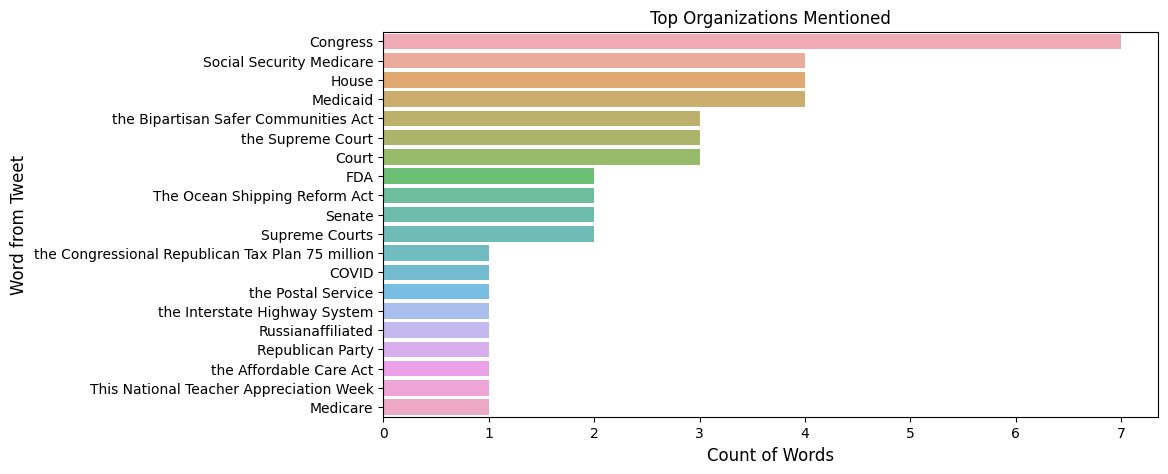

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


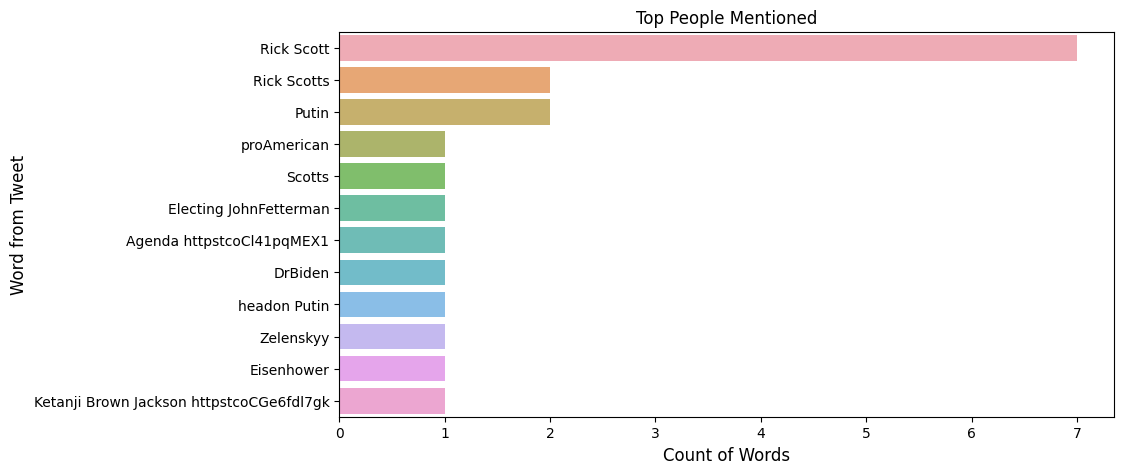

In [ ]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()